# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

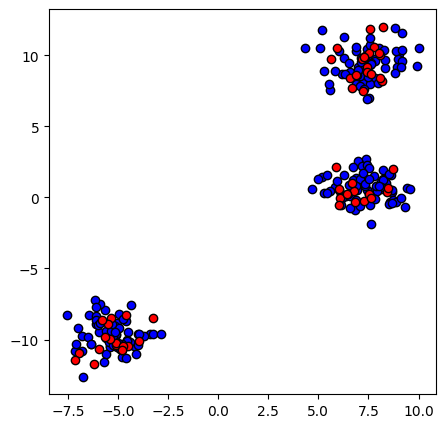

In [ ]:
X, _ = make_blobs(n_samples = 250, n_features = 2, random_state=8)

# Train test splits
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

_, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c='r', edgecolors='k')

plt.show()

In [ ]:
#Calc eps with most range size in x o y and samples with 10% total samples
X_data = X_train
eps = max(X_data[:, 0].max() - X_data[:, 0].min(), X_data[:, 1].max() - X_data[:, 1].min()) / 10
min_samples = int(0.1 * X_data.shape[0])

print(eps, min_samples)

dbscan = DBSCAN(eps= eps , min_samples= min_samples)

# Train DBSCAN
dbscan.fit( X_data )


2.452571810052509 20


DBSCAN(eps=np.float64(2.452571810052509), min_samples=20)

In [ ]:
# Predictions
predictions = dbscan.labels_

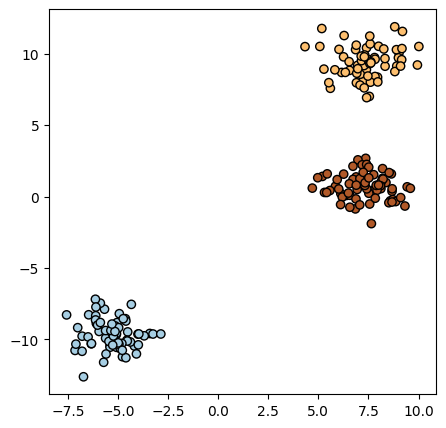

In [ ]:
_, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_data[:, 0], X_data[:, 1], c=predictions, edgecolors='k', cmap='Paired')

In [ ]:
print(np.unique(predictions))

[0 1 2]


# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
_


plt.scatter( _ , _ )
print (X.shape, y.shape)

In [ ]:
dbscan = DBSCAN(eps= _ , min_samples= _ )
dbscan.fit( _ )

In [ ]:
predictions = _

In [ ]:
# Plot
_

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

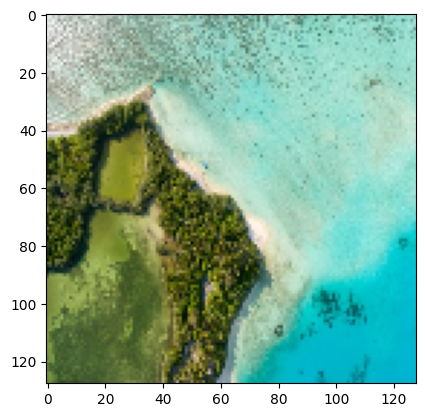

In [ ]:
original_image = cv2.imread('/content/image1.jpeg')

img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_rgb_resized = cv2.resize(img_rgb, (128, 128))

plt.imshow(img_rgb_resized)
plt.show()

In [ ]:
vectorized = img_rgb_resized.copy().reshape((-1, 3))
print(vectorized.shape)

(16384, 3)


In [ ]:
#Calc eps with most range size in x o y and samples with 10% total samples
eps = max(vectorized[:, 0].max() - vectorized[:, 0].min(), vectorized[:, 1].max() - vectorized[:, 1].min(), vectorized[:, 2].max() - vectorized[:, 2].min()) / 10
min_samples = int(0.01 * vectorized.shape[0])

print(eps, min_samples)

dbscan = DBSCAN(eps= eps , min_samples= min_samples)

# Train DBSCAN
dbscan.fit( vectorized )


25.5 163


DBSCAN(eps=np.float64(25.5), min_samples=163)

In [ ]:
predictions = dbscan.labels_

print(predictions.shape)

predictions = predictions.reshape(img_rgb_resized.shape[:2])
print(predictions.shape)

(16384,)
(128, 128)


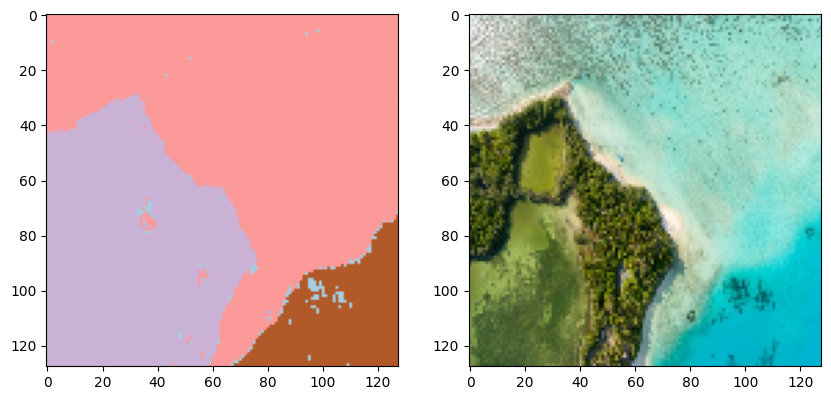

In [ ]:
#Show image
_, axes = plt.subplots(1,2, figsize = (10,9))
axes[0].imshow(predictions, cmap='Paired')
axes[1].imshow( img_rgb_resized)
plt.show()

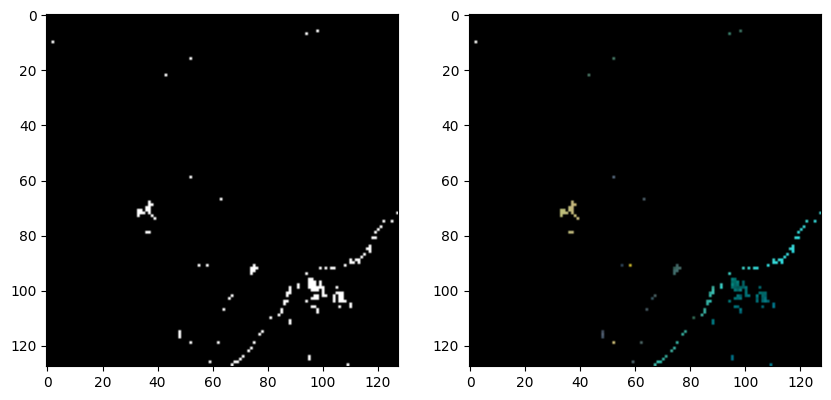

(128, 128)


In [ ]:
#Create mask
cluster = -1

cluster_mask = np.array(predictions == cluster, dtype= np.uint8)
masked_image = cv2.bitwise_and(img_rgb_resized, img_rgb_resized, mask = cluster_mask)

_, axes = plt.subplots(1,2, figsize = (10,9))
axes[0].imshow(cluster_mask, cmap='gray')
axes[1].imshow(masked_image)
plt.show()

print(mask.shape)